# Predictive ML Project  
**Author:** Bakhrom Botirov  
[GitHub Repository](https://github.com/batyrovbahrom96-svg/datafun-07-ml)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 – Chart a Straight Line



   Celsius  Fahrenheit
0        0        32.0
1       10        50.0
2       20        68.0
3       30        86.0
4       40       104.0


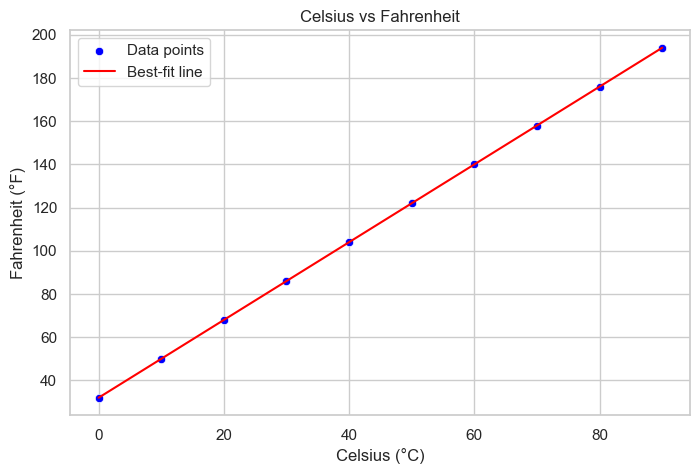

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Celsius and Fahrenheit data
celsius = np.arange(0, 100, 10)
fahrenheit = (9/5) * celsius + 32

# Create DataFrame
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
print(df.head())

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.scatterplot(x='Celsius', y='Fahrenheit', data=df, color='blue', label='Data points')
sns.lineplot(x='Celsius', y='Fahrenheit', data=df, color='red', label='Best-fit line')
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.legend()
plt.show()

## Part 2 – Predict Avg High Temp in NYC in January (Using SciPy)


Head of dataset:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Columns: Index(['Date', 'Value', 'Anomaly'], dtype='object')

Descriptive statistics:
          Date  Temperature
count   124.00       124.00
mean   1956.50        37.60
std      35.94         4.54
min    1895.00        26.10
25%    1925.75        34.58
50%    1956.50        37.60
75%    1987.25        40.60
max    2018.00        47.60

Predicted Avg High Temp in NYC (Jan 2024): 38.59°F


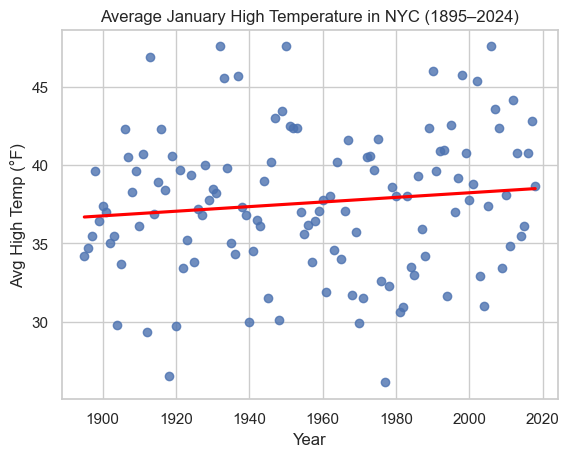

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (corrected link)
url = "https://raw.githubusercontent.com/pdeitel/IntroToPython/master/examples/ch15/ave_hi_nyc_jan_1895-2018.csv"
nyc_df = pd.read_csv(url)

# Inspect data
print("Head of dataset:")
print(nyc_df.head())
print("\nColumns:", nyc_df.columns)

# Clean data
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df = nyc_df[['Date', 'Temperature']]
nyc_df['Date'] = nyc_df['Date'].astype(str).str.extract(r'(\d{4})').astype(int)

# Display stats
pd.set_option('display.precision', 2)
print("\nDescriptive statistics:")
print(nyc_df.describe())

# Build model
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=nyc_df.Date, y=nyc_df.Temperature
)

# Predict 2024 temperature
prediction_2024 = slope * 2024 + intercept
print(f"\nPredicted Avg High Temp in NYC (Jan 2024): {prediction_2024:.2f}°F")

# Plot data
sns.set_style("whitegrid")
sns.regplot(x="Date", y="Temperature", data=nyc_df, ci=None, line_kws={"color": "red"})
plt.title("Average January High Temperature in NYC (1895–2024)")
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")
plt.show()


## Part 3 – Predict Avg High Temp in NYC in January (Using scikit-learn)



     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
Slope (coef_): 0.0001
Intercept: 13.7938

Predicted Avg High Temp in NYC (Jan 2024): 14.04°F


c:\Users\Asus\Desktop\datafun-07-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


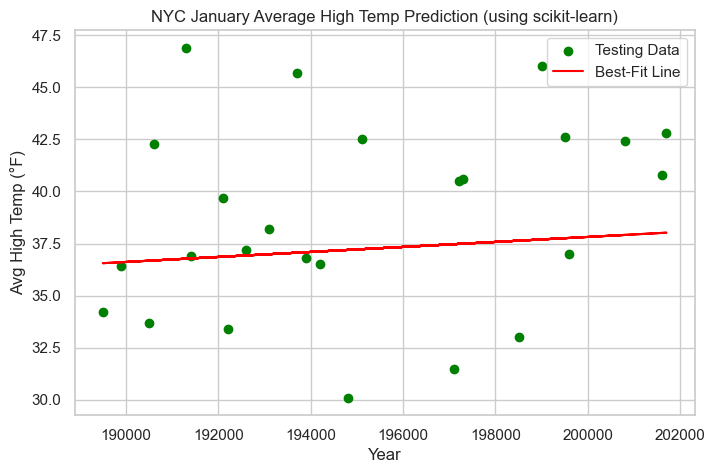

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset again (same as before)
url = "https://raw.githubusercontent.com/pdeitel/IntroToPython/master/examples/ch15/ave_hi_nyc_jan_1895-2018.csv"
nyc_df = pd.read_csv(url)

# Inspect columns
print(nyc_df.head())

# Clean and select columns
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df = nyc_df[['Date', 'Temperature']]

# Convert Date to integer
nyc_df['Date'] = nyc_df['Date'].astype(int)

# Split data for training and testing
X = nyc_df[['Date']]   # feature
y = nyc_df['Temperature']   # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model parameters
print(f"Slope (coef_): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Predict for 2024
prediction_2024 = model.predict([[2024]])
print(f"\nPredicted Avg High Temp in NYC (Jan 2024): {prediction_2024[0]:.2f}°F")

# Visualize results
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="green", label="Testing Data")
plt.plot(X_test, model.predict(X_test), color="red", label="Best-Fit Line")
plt.title("NYC January Average High Temp Prediction (using scikit-learn)")
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")
plt.legend()
plt.show()
